# Aula Prática: Técnicas de Redução de Dimensionalidade (Linear e Não-Linear)

## Plano de Aula:
1.  **Início (Introdução e Simplicidade):**
    * Conjuntos de dados **Iris** e **Wine** para entender **PCA** e **LDA** de forma fácil.
2.  **Exercício Principal (Diferença Linear vs. Não-Linear):**
    * Conjuntos de dados **MNIST** ou **Fashion-MNIST** para demonstrar claramente as diferenças.
3.  **Avançado (Dados de Texto):**
    * Conjunto de dados **20 Newsgroups** (texto → ideal para TF-IDF + SVD/UMAP).

**Objetivo:** Explorar e comparar diversas técnicas de redução de dimensionalidade, entendendo quando usar cada uma.

In [2]:
# import das bibliotecas

# manipulação de dados e calculo numérico
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Redução de dimensionalidade
from sklearn.datasets import load_iris, load_wine, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding as LLE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import umap
from sklearn.datasets import fetch_20newsgroups

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## **PCA e LDA no dataset Iris**

In [4]:
# import iris dataset
print("--- Carregando dataset Iris ---")
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names
target_names_iris = iris.target_names

print(f"Formato de X (iris): {X_iris.shape}")
print(f"Formato de y (iris): {y_iris.shape}")
print(f"Nome das features (iris): {feature_names_iris}")
print(f"Nomes das classes (iris): {target_names_iris}")

--- Carregando dataset Iris ---
Formato de X (iris): (150, 4)
Formato de y (iris): (150,)
Nome das features (iris): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nomes das classes (iris): ['setosa' 'versicolor' 'virginica']


In [6]:
# Normalização dos dados
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

In [8]:
# PCA e visualização
pca_iris = PCA(n_components=2) # n_components é a quantidade de componentes que queremos na redução, neste caso 2
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)

In [10]:
print(f"Formato dos dados de Iris após PCA: {X_iris_pca.shape}")
print(f"Variância explicada por cada componentes: {pca_iris.explained_variance_ratio_}")
print(f"Variância total explicada : {np.sum(pca_iris.explained_variance_ratio_):.4f}")

Formato dos dados de Iris após PCA: (150, 2)
Variância explicada por cada componentes: [0.72962445 0.22850762]
Variância total explicada : 0.9581


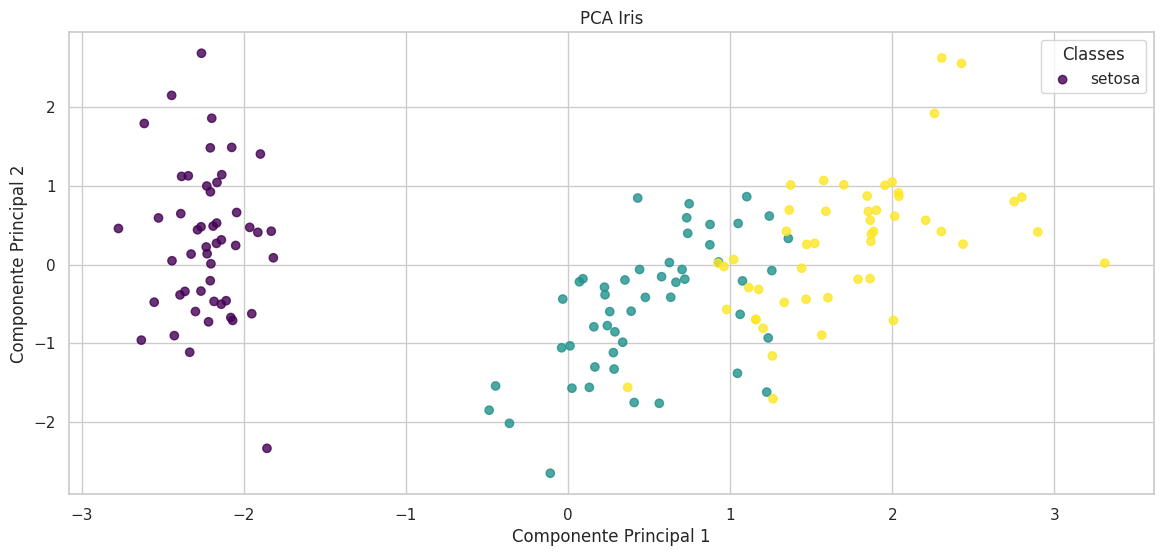

In [13]:
# Visualização do LDA Iris
plt.figure(figsize=(14, 6))
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris, cmap='viridis', alpha=0.8)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(target_names_iris, title='Classes')
plt.title('LDA Iris')
plt.show()

In [14]:
# Aplicação do LDA
lda_iris = LDA(n_components=2)
X_iris_lda = lda_iris.fit_transform(X_iris_scaled, y_iris)

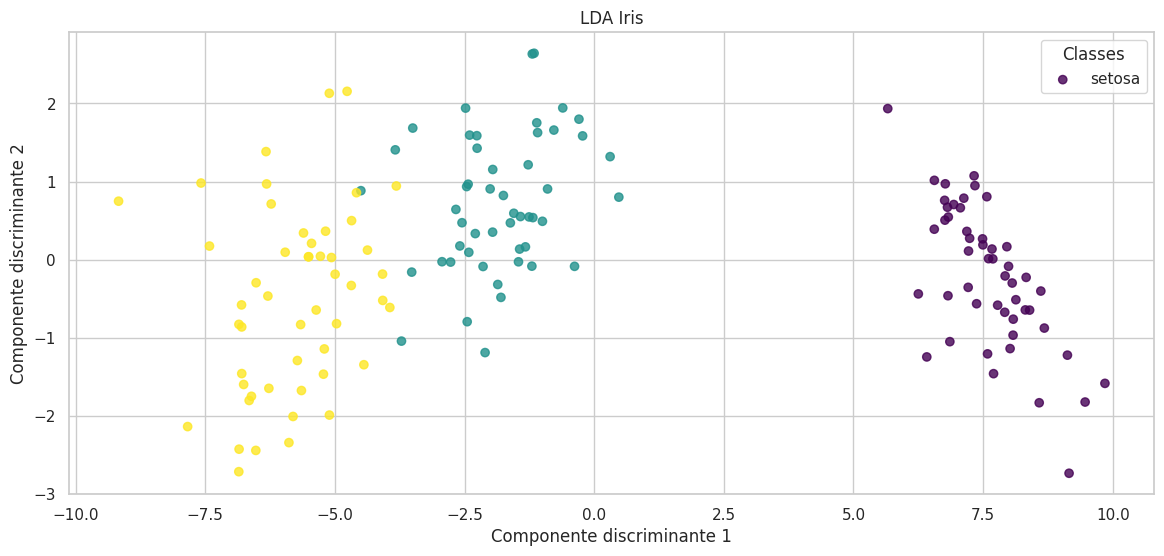

In [15]:
# Visualização do PCA Iris
plt.figure(figsize=(14, 6))
plt.scatter(X_iris_lda[:, 0], X_iris_lda[:, 1], c=y_iris, cmap='viridis', alpha=0.8)
plt.xlabel('Componente discriminante 1')
plt.ylabel('Componente discriminante 2')
plt.legend(target_names_iris, title='Classes')
plt.title('LDA Iris')
plt.show()

## **PCA e LDA no Dataset Wine**

In [17]:
print("--- Carregabdo dataset Wine ---")
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names_wine = wine.feature_names
target_names_wine = wine.target

print(f"Formato de X (wine): {X_wine.shape}")
print(f"Formato de y (wine): {y_wine.shape}")
print(f"Nome das features (wine): {feature_names_wine}")
print(f"Nomes das classes (wine):{target_names_wine}")

--- Carregabdo dataset Wine ---
Formato de X (wine): (178, 13)
Formato de y (wine): (178,)
Nome das features (wine): ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Nomes das classes (wine):[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
# normalização
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

In [19]:
# PCA e visualização
pca_wine = PCA(n_components=2) # n_components é a quantidade de componentes que queremos na redução, neste caso 2
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

In [20]:
print(f"Formato dos dados de Iris após PCA: {X_wine_pca.shape}")
print(f"Variância explicada por cada componentes: {pca_wine.explained_variance_ratio_}")
print(f"Variância total explicada : {np.sum(pca_wine.explained_variance_ratio_):.4f}")

Formato dos dados de Iris após PCA: (178, 2)
Variância explicada por cada componentes: [0.36198848 0.1920749 ]
Variância total explicada : 0.5541


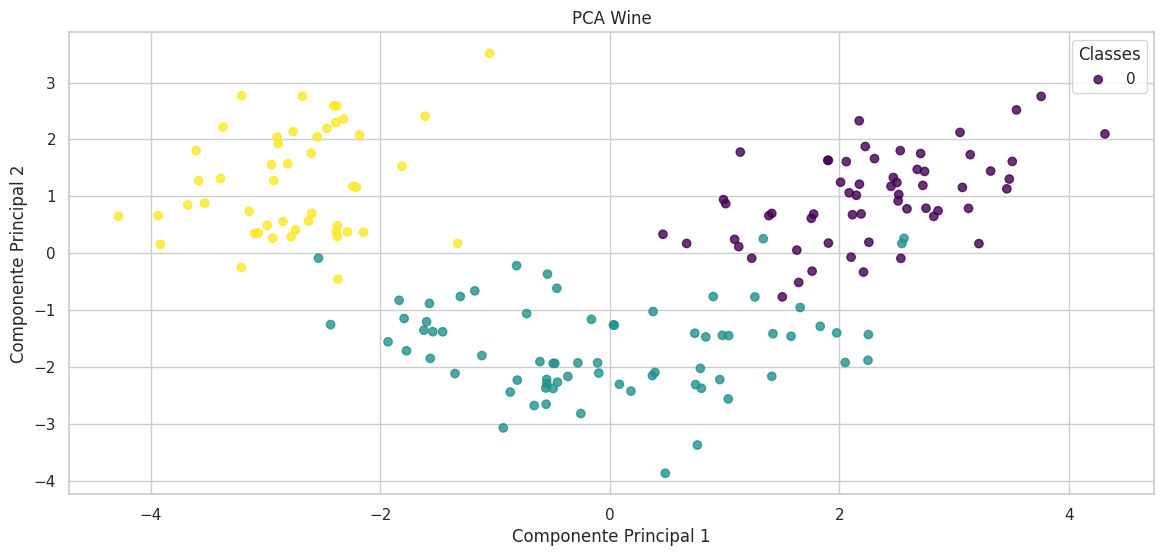

In [25]:
# Visualização do PCA Iris
plt.figure(figsize=(14, 6))
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, cmap='viridis', alpha=0.8)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(target_names_wine, title='Classes')
plt.title('PCA Wine')
plt.show()

In [21]:
# LDA
lda_wine = LDA(n_components=2)
X_wine_lda = lda_wine.fit_transform(X_wine_scaled, y_wine)

In [22]:
print(f"Formato dos dados de Wine após LDA: {X_wine_lda.shape}")

Formato dos dados de Wine após LDA: (178, 2)


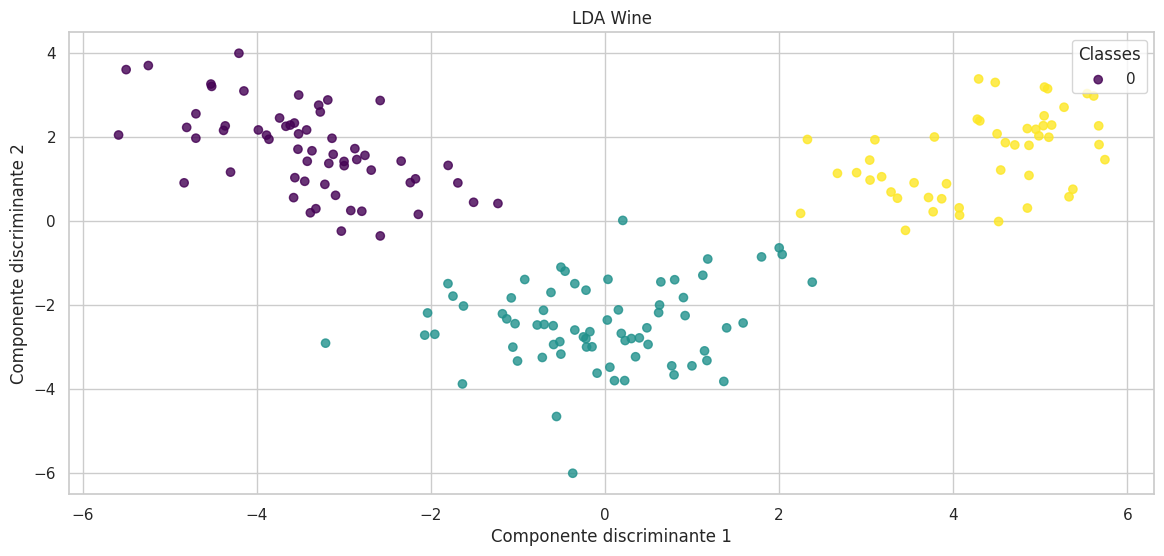

In [26]:
# Visualização do LDA Wine
plt.figure(figsize=(14, 6))
plt.scatter(X_wine_lda[:, 0], X_wine_lda[:, 1], c=y_wine, cmap='viridis', alpha=0.8)
plt.xlabel('Componente discriminante 1')
plt.ylabel('Componente discriminante 2')
plt.legend(target_names_wine, title='Classes')
plt.title('LDA Wine')
plt.show()

## Parte 2: Exercício - MNIST/Fashion-MNIST

Nesta seção, vamos aplicar as técnicas de redução de dimensionalidade em um conjunto de dados com mais características e com uma estrutura que pode ser **não-linear**. Isso mostrará a diferença entre métodos lineares e não-lineares.

Usaremos o conjunto de dados **Fashion-MNIST**, que é uma alternativa ao MNIST de dígitos manuscritos, contendo imagens de 10 classes de roupas. Cada imagem é de 28x28 pixels, resultando em 784 características.

Vamos comparar:
* **PCA:** Método linear.
* **Kernel PCA:** Método não-linear usando o truque do kernel.
* **t-SNE:** Método não-linear focado em visualização.
* **Isomap:** Método não-linear focado em preservar distâncias geodésicas.
* **LLE:** Método não-linear que preserva a estrutura local linear.
* **UMAP:** Um método não-linear mais moderno, frequentemente mais rápido e com melhor preservação global que o t-SNE.

In [27]:
# carrega o dataset mnist fashion
print("--- Carregando dataset Fashion-MNIST ---")
X_fashion_mnist, y_fashion_mnist = fashion_mnist = fetch_openml(
                                                    'Fashion-MNIST', version=1,
                                                    return_X_y=True,
                                                    as_frame=False,
                                                    parser='auto')
y_fashion_mnist = y_fashion_mnist.astype(int) # transforma o y em inteiro

--- Carregando dataset Fashion-MNIST ---


In [28]:
# reduzir contjunto de dados para evitar demorar demais
n_samples_full = X_fashion_mnist.shape[0]
n_samples_viz = 10000 # Amostras para visualização rapida (t-SNE, UMAP)
n_samples_slow = 5000 # Amostras para métodos mais lentos (ISOMAP e LLE)

In [29]:
if n_samples_full > n_samples_viz:
    idx_viz = np.random.choice(n_samples_full, n_samples_viz, replace=False)
    X_fashion_mnist_viz = X_fashion_mnist[idx_viz]
    y_fashion_mnist_viz = y_fashion_mnist[idx_viz]
else:
    X_fashion_mnist_viz = X_fashion_mnist
    y_fashion_mnist_viz = y_fashion_mnist

if n_samples_full > n_samples_slow:
    idx_slow = np.random.choice(n_samples_full, n_samples_slow, replace=False)
    X_fashion_mnist_slow = X_fashion_mnist[idx_slow]
    y_fashion_mnist_slow = y_fashion_mnist[idx_slow]
else:
    X_fashion_mnist_slow = X_fashion_mnist
    y_fashion_mnist_slow = y_fashion_mnist

In [31]:
print(f"Dataset Fashion Mnist Carregado com {n_samples_full} Amostras")
print(f"Usando {X_fashion_mnist_viz.shape[0]} amostras para visualização rapida, modelos T-SNE, UMAP")
print(f"Usando {X_fashion_mnist_slow.shape[0]} amostras para métodos mais lentos, modelos isomap e LLE")

Dataset Fashion Mnist Carregado com 70000 Amostras
Usando 10000 amostras para visualização rapida, modelos T-SNE, UMAP
Usando 5000 amostras para métodos mais lentos, modelos isomap e LLE


In [32]:
target_names_fashion = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
# Normalização
scaler_fashion = StandardScaler()
X_fashion_mnist_viz_scaled = scaler_fashion.fit_transform(X_fashion_mnist_viz)
X_fashion_mnist_slow_scaled = scaler_fashion.fit_transform(X_fashion_mnist_slow)

In [39]:
print("--- Carregando Dataset Fashion-MNIST ---")
X_fashion_mnist, y_fashion_mnist = fetch_openml(
    'Fashion-MNIST', version=1, return_X_y=True, as_frame=False, parser='auto'
)
y_fashion_mnist = y_fashion_mnist.astype(int)
# Reduzir o tamanho do dataset para acelerar o processamento, especialmente para t-SNE e LLE
# Usaremos 10.000 amostras para visualização e 5.000 para métodos mais lentos se necessário
n_samples_full = X_fashion_mnist.shape[0]
n_samples_viz = 10000 # Amostras para visualização rápida (t-SNE, UMAP)
n_samples_slow = 5000 # Amostras para métodos mais lentos (Isomap, LLE)

if n_samples_full > n_samples_viz:
    idx_viz = np.random.choice(n_samples_full, n_samples_viz, replace=False)
    X_fashion_mnist_viz = X_fashion_mnist[idx_viz]
    y_fashion_mnist_viz = y_fashion_mnist[idx_viz]
else:
    X_fashion_mnist_viz = X_fashion_mnist
    y_fashion_mnist_viz = y_fashion_mnist

if n_samples_full > n_samples_slow:
    idx_slow = np.random.choice(n_samples_full, n_samples_slow, replace=False)
    X_fashion_mnist_slow = X_fashion_mnist[idx_slow]
    y_fashion_mnist_slow = y_fashion_mnist[idx_slow]
else:
    X_fashion_mnist_slow = X_fashion_mnist
    y_fashion_mnist_slow = y_fashion_mnist


print(f"Dataset Fashion-MNIST carregado com {n_samples_full} amostras.")
print(f"Usando {X_fashion_mnist_viz.shape[0]} amostras para visualização rápida.")
print(f"Usando {X_fashion_mnist_slow.shape[0]} amostras para métodos mais lentos.")

# Nomes das classes (Fashion-MNIST)
# 0: T-shirt/top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot
target_names_fashion = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalização é crucial para todos os métodos
print("\nNormalizando os dados...")
scaler_fashion = StandardScaler()
X_fashion_mnist_viz_scaled = scaler_fashion.fit_transform(X_fashion_mnist_viz)
X_fashion_mnist_slow_scaled = scaler_fashion.fit_transform(X_fashion_mnist_slow) # Usar o mesmo scaler, mas reajustar para o subconjunto


# ### Comparando Métodos Lineares (PCA) e Não-Lineares em Fashion-MNIST

# %%
# Definir os parâmetros de redução para visualização (2 componentes)
n_components = 2

# 1. PCA (Linear)
print("\nAplicando PCA...")
pca_fashion = PCA(n_components=n_components)
X_fashion_pca = pca_fashion.fit_transform(X_fashion_mnist_viz_scaled)
print(f"PCA: Variância total explicada: {np.sum(pca_fashion.explained_variance_ratio_):.4f}")

# 2. Kernel PCA (Não-Linear)
# Kernel PCA pode ser lento, usar um subconjunto menor se necessário
print("\nAplicando Kernel PCA (pode ser lento)...")
# Usando um kernel RBF e alguns dados para este exemplo
kpca_fashion = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.001, fit_inverse_transform=False, random_state=42)
X_fashion_kpca = kpca_fashion.fit_transform(X_fashion_mnist_viz_scaled[:2000]) # Usar subconjunto menor para velocidade
y_fashion_kpca = y_fashion_mnist_viz[:2000] # Coletar os rótulos correspondentes

# 3. t-SNE (Não-Linear) - Focado em Visualização
# t-SNE é muito lento, usamos o dataset de visualização reduzido.
# Ajustar perplexity para a quantidade de dados (geralmente entre 5 e 50)
print("\nAplicando t-SNE (pode ser muito lento)...")
# Reduzir ainda mais o dataset para t-SNE se for muito grande
n_samples_tsne = 5000 # Limitar para que rode em tempo razoável
if X_fashion_mnist_viz_scaled.shape[0] > n_samples_tsne:
    idx_tsne = np.random.choice(X_fashion_mnist_viz_scaled.shape[0], n_samples_tsne, replace=False)
    X_tsne_input = X_fashion_mnist_viz_scaled[idx_tsne]
    y_tsne_input = y_fashion_mnist_viz[idx_tsne]
else:
    X_tsne_input = X_fashion_mnist_viz_scaled
    y_tsne_input = y_fashion_mnist_viz

tsne = TSNE(n_components=n_components, perplexity=30, n_iter=300, random_state=42)
X_fashion_tsne = tsne.fit_transform(X_tsne_input)

# 4. Isomap (Não-Linear)
# Isomap é lento, usamos o dataset para métodos lentos
print("\nAplicando Isomap (pode ser lento)...")
n_neighbors_isomap = 15 # Número de vizinhos
isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors_isomap)
X_fashion_isomap = isomap.fit_transform(X_fashion_mnist_slow_scaled)

# 5. LLE (Não-Linear)
# LLE também é lento, usamos o dataset para métodos lentos
print("\nAplicando LLE (pode ser lento)...")
n_neighbors_lle = 15 # Número de vizinhos
lle = LLE(n_components=n_components, n_neighbors=n_neighbors_lle, random_state=42)
X_fashion_lle = lle.fit_transform(X_fashion_mnist_slow_scaled)

# 6. UMAP (Não-Linear) - Moderno e rápido para visualização
# Pode usar o dataset de visualização rápido
print("\nAplicando UMAP...")
umap_reducer = umap.UMAP(n_components=n_components, random_state=42)
X_fashion_umap = umap_reducer.fit_transform(X_fashion_mnist_viz_scaled)

--- Carregando Dataset Fashion-MNIST ---
Dataset Fashion-MNIST carregado com 70000 amostras.
Usando 10000 amostras para visualização rápida.
Usando 5000 amostras para métodos mais lentos.

Normalizando os dados...

Aplicando PCA...
PCA: Variância total explicada: 0.3626

Aplicando Kernel PCA (pode ser lento)...

Aplicando t-SNE (pode ser muito lento)...

Aplicando Isomap (pode ser lento)...

Aplicando LLE (pode ser lento)...

Aplicando UMAP...


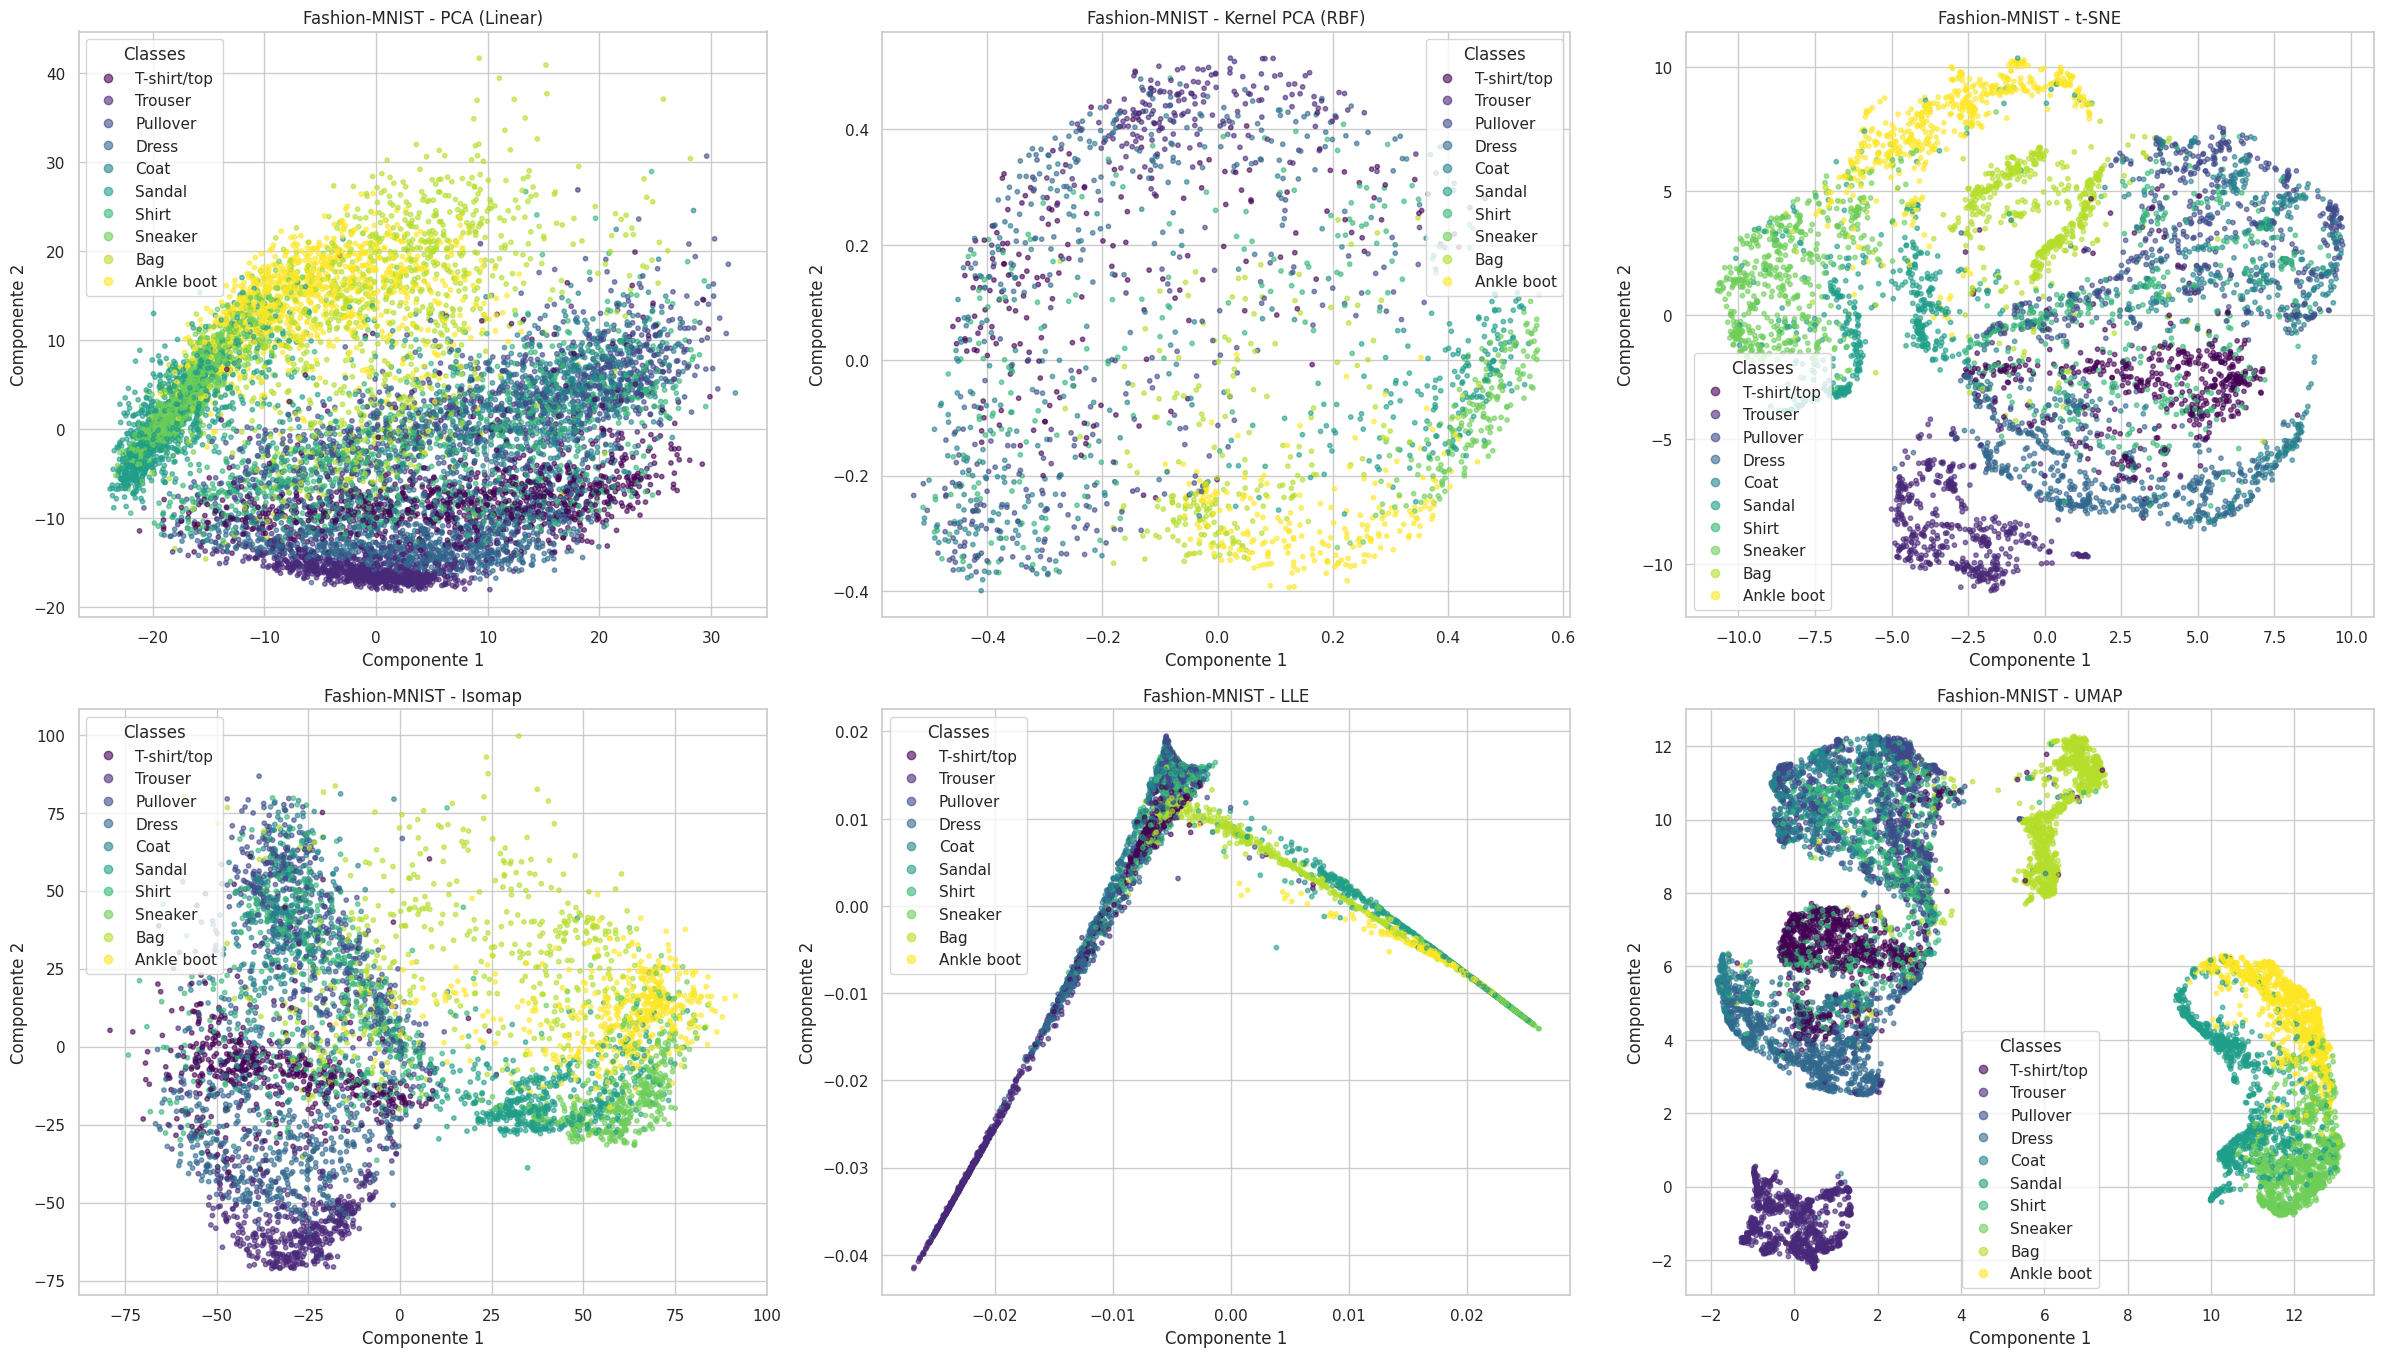

In [40]:
def plot_dimensionality_reduction(X_reduced, y, title, ax, target_names):
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.6, s=10)
    ax.set_title(title)
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')

    # Adicionar legendas
    legend_elements = scatter.legend_elements()[0]
    ax.legend(handles=legend_elements, labels=target_names, title="Classes", loc="best")


# Preparar os eixos para os gráficos
fig, axes = plt.subplots(3, 3, figsize=(24, 20))
axes = axes.flatten() # Achata a matriz de eixos para facilitar a iteração

# PCA
plot_dimensionality_reduction(X_fashion_pca, y_fashion_mnist_viz, 'Fashion-MNIST - PCA (Linear)', axes[0], target_names_fashion)

# Kernel PCA (usando o subconjunto menor)
plot_dimensionality_reduction(X_fashion_kpca, y_fashion_kpca, 'Fashion-MNIST - Kernel PCA (RBF)', axes[1], target_names_fashion)

# t-SNE (usando o subconjunto reduzido)
plot_dimensionality_reduction(X_fashion_tsne, y_tsne_input, 'Fashion-MNIST - t-SNE', axes[2], target_names_fashion)

# Isomap (usando o dataset para métodos lentos)
plot_dimensionality_reduction(X_fashion_isomap, y_fashion_mnist_slow, 'Fashion-MNIST - Isomap', axes[3], target_names_fashion)

# LLE (usando o dataset para métodos lentos)
plot_dimensionality_reduction(X_fashion_lle, y_fashion_mnist_slow, 'Fashion-MNIST - LLE', axes[4], target_names_fashion)

# UMAP (usando o dataset de visualização rápido)
plot_dimensionality_reduction(X_fashion_umap, y_fashion_mnist_viz, 'Fashion-MNIST - UMAP', axes[5], target_names_fashion)

# Ocultar eixos não utilizados
for i in range(6, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Parte 3: Dados de Texto com 20 Newsgroups

Para dados de texto, o pré-processamento envolve a conversão do texto em representações numéricas. Técnicas como **TF-IDF (Term Frequency-Inverse Document Frequency)** são usadas para criar vetores de características.

Após a vetorização, podemos aplicar técnicas de redução de dimensionalidade. **Truncated SVD (Singular Value Decomposition)** é uma variante da PCA para matrizes esparsas (como as geradas por TF-IDF). **UMAP** também é excelente para visualizar e reduzir a dimensionalidade de dados de texto.

Vamos usar o conjunto de dados **20 Newsgroups**, que contém documentos de 20 categorias diferentes.

--- Carregando Dataset 20 Newsgroups ---
Dataset 20 Newsgroups carregado com 10729 documentos.
Número de classes: 19

Realizando vetorização TF-IDF...
Formato da matriz TF-IDF: (10729, 142114)

Aplicando Truncated SVD...
SVD: Variância total explicada: 0.0049

Aplicando UMAP em dados de texto...


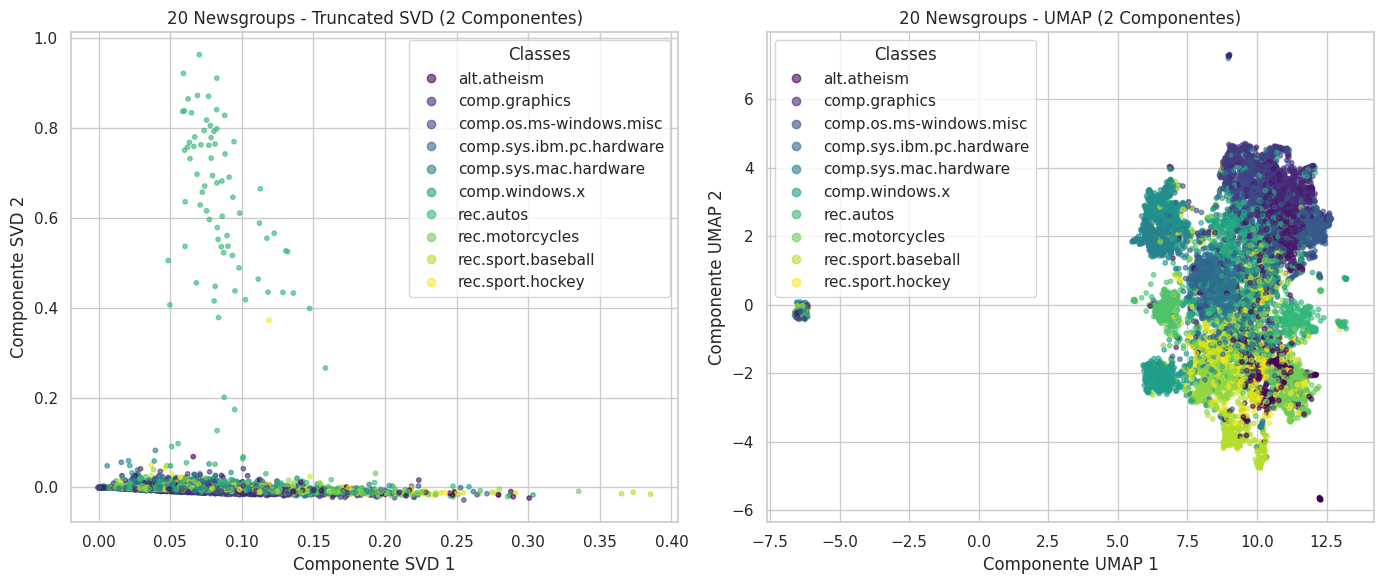

In [41]:
# ### Carregamento e Pré-processamento dos Dados: 20 Newsgroups
print("--- Carregando Dataset 20 Newsgroups ---")

categories = [
    'alt.atheism', 'soc.religion.christian', 'comp.graphics', 'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos',
    'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
    'sci.electronics', 'sci.med', 'sci.space', 'talk.politics.misc', 'talk.politics.guns',
    'talk.politics.mideast', 'talk.religion.misc'
]

newsgroups = fetch_20newsgroups(subset='train', categories=categories,
                                remove=('headers', 'footers', 'quotes'),
                                random_state=42)

X_text = newsgroups.data
y_text = newsgroups.target
target_names_text = newsgroups.target_names

print(f"Dataset 20 Newsgroups carregado com {len(X_text)} documentos.")
print(f"Número de classes: {len(target_names_text)}")


print("\nRealizando vetorização TF-IDF...")
# Usar TfidfVectorizer para converter texto em vetores numéricos
# max_df: ignora termos que aparecem em mais de X% dos documentos
# min_df: ignora termos que aparecem em menos de X documentos
# stop_words: remove palavras comuns que não carregam muito significado
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2)) # ngram_range=(1,2) considera palavras únicas e pares de palavras
X_text_tfidf = vectorizer.fit_transform(X_text)

print(f"Formato da matriz TF-IDF: {X_text_tfidf.shape}")
# A matriz é esparsa, o que é comum em dados de texto


# ### Aplicando Redução de Dimensionalidade em Dados de Texto

# Definir número de componentes para visualização
n_components_text = 2

# 1. Truncated SVD (Similar ao PCA para matrizes esparsas)
print("\nAplicando Truncated SVD...")
svd_text = TruncatedSVD(n_components=n_components_text, random_state=42)
X_text_svd = svd_text.fit_transform(X_text_tfidf)
print(f"SVD: Variância total explicada: {np.sum(svd_text.explained_variance_ratio_):.4f}")

# 2. UMAP (Excelente para texto e visualização)
print("\nAplicando UMAP em dados de texto...")
# UMAP lida bem com dados esparsos diretamente
umap_text_reducer = umap.UMAP(n_components=n_components_text, random_state=42, metric='cosine') # 'cosine' é bom para texto
X_text_umap = umap_text_reducer.fit_transform(X_text_tfidf)



# ### Visualização dos Resultados de Texto


# Visualização SVD
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter_svd_text = plt.scatter(X_text_svd[:, 0], X_text_svd[:, 1], c=y_text, cmap='viridis', alpha=0.6, s=10)
plt.title('20 Newsgroups - Truncated SVD (2 Componentes)')
plt.xlabel('Componente SVD 1')
plt.ylabel('Componente SVD 2')
plt.legend(handles=scatter_svd_text.legend_elements()[0], labels=target_names_text, title="Classes", loc="best")

# Visualização UMAP
plt.subplot(1, 2, 2)
scatter_umap_text = plt.scatter(X_text_umap[:, 0], X_text_umap[:, 1], c=y_text, cmap='viridis', alpha=0.6, s=10)
plt.title('20 Newsgroups - UMAP (2 Componentes)')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.legend(handles=scatter_umap_text.legend_elements()[0], labels=target_names_text, title="Classes", loc="best")

plt.tight_layout()
plt.show()